In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
torch.manual_seed(0)

In [2]:
def get_generator_block(in_dim,out_dim):
  return nn.Sequential(
      nn.Linear(in_dim,out_dim),
      nn.BatchNorm1d(out_dim),
      nn.ReLU(inplace=True),
  )

In [3]:
class Generator(nn.Module):
  def __init__(self, z_dim=10, im_dim=784, hidden_dim=128):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            get_generator_block(z_dim, hidden_dim),
            get_generator_block(hidden_dim, hidden_dim * 2),
            get_generator_block(hidden_dim * 2, hidden_dim * 4),
            get_generator_block(hidden_dim * 4, hidden_dim * 8),
            nn.Linear(hidden_dim * 8, im_dim),
            nn.Sigmoid()
        )
  def forward(self, noise):
      return self.gen(noise)

In [4]:
def get_noise(n_samples,z_dim,device='cpu'):
  return torch.randn(n_samples, z_dim, device = device)

In [5]:
def get_discriminator_block(in_dim,out_dim):
  return nn.Sequential(
      nn.Linear(in_dim,out_dim),
      nn.LeakyReLU(negative_slope=0.2,inplace=True),
  )

In [13]:
class Discriminator(nn.Module):
  def __init__(self,im_dim=784,hidden_dim=128):
    super(Discriminator,self).__init__()
    self.disc=nn.Sequential(
        get_discriminator_block(im_dim,hidden_dim*4),
        get_discriminator_block(hidden_dim*4,hidden_dim*2),
        get_discriminator_block(hidden_dim*2,hidden_dim),
        nn.Linear(hidden_dim,1)

    )

  def forward(self,image):
    return self.disc(image)

In [14]:
criterion=nn.BCEWithLogitsLoss()
n_epochs=200
z_dim=64
display_step=5000
batch_size=128
lr=0.00001

dataloader=DataLoader(MNIST('.',download=True,transform=transforms.ToTensor()),
                      batch_size=batch_size,shuffle=True
                      )
device='cuda'

In [20]:
gen=Generator(z_dim).to(device)
gen_opt=torch.optim.Adam(gen.parameters(),lr=lr)
disc=Discriminator().to(device)
disc_opt=torch.optim.Adam(disc.parameters(),lr=lr)

In [21]:
def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):
    fake_images = gen(get_noise(num_images, z_dim, device=device))
    fake_images.detach_()
    fake_loss = criterion(disc(fake_images),torch.zeros((num_images,1),device = device))
    real_loss = criterion(disc(real),torch.ones((num_images,1),device = device))
    disc_loss = ( fake_loss + real_loss ) / 2.0
    #### END CODE HERE ####
    return disc_loss

In [22]:
def get_gen_loss(gen,disc,criterion,real,num_images,z_dim,device):
    noises = get_noise(num_images,z_dim, device = device)
    fake_images = gen(noises)
    out = disc(fake_images)
    gen_loss = criterion(out, torch.ones(num_images, 1).to(device))
    return gen_loss

In [23]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 10, step 5000: Generator loss: 4.367717710399642, discriminator loss: 0.06263541200533512


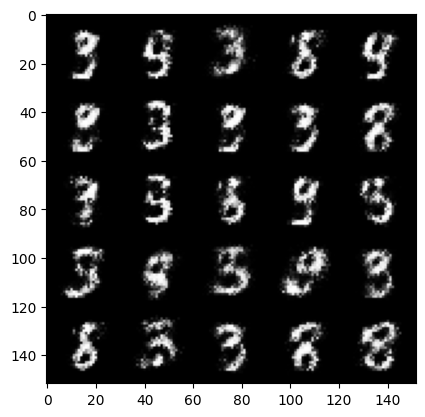

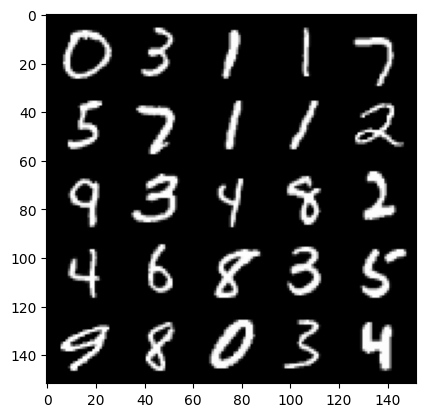

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 21, step 10000: Generator loss: 3.8818487276554245, discriminator loss: 0.1151812614589932


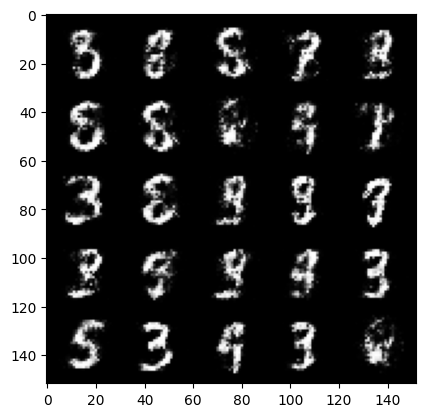

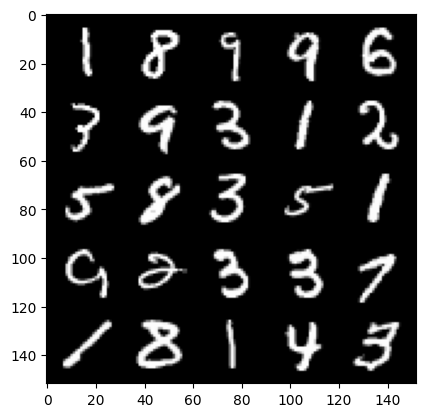

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 31, step 15000: Generator loss: 3.261198357963561, discriminator loss: 0.16372434542775194


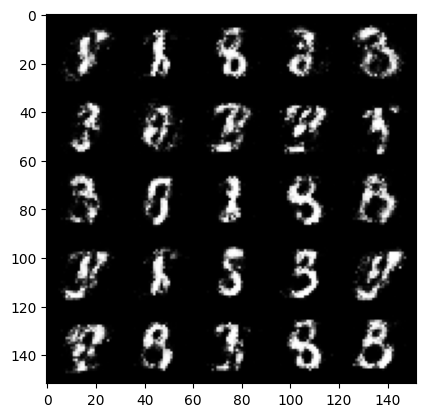

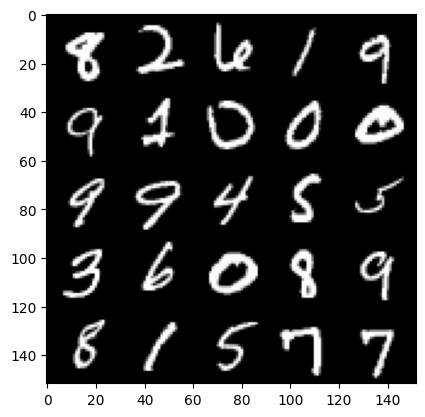

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 42, step 20000: Generator loss: 2.755306204414369, discriminator loss: 0.21199134431779376


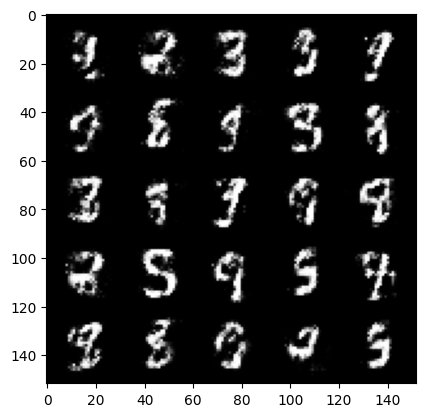

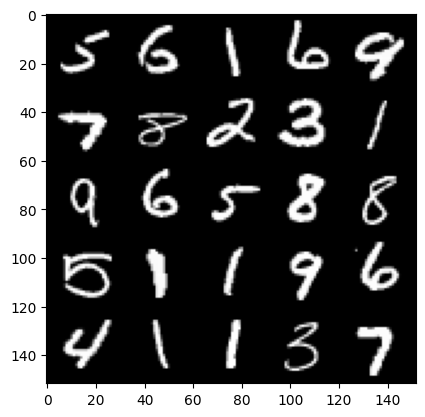

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 53, step 25000: Generator loss: 2.371929996037484, discriminator loss: 0.2680641802340744


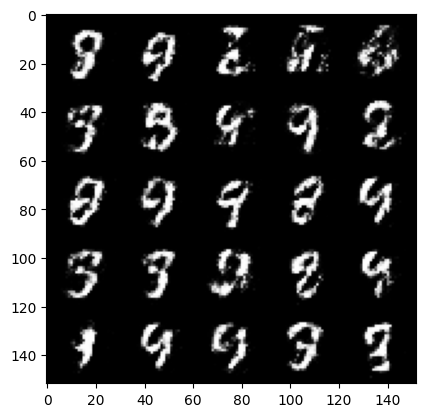

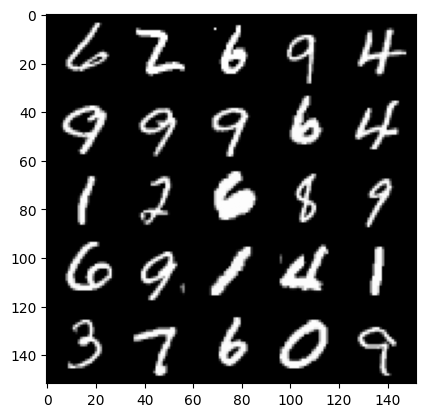

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 63, step 30000: Generator loss: 2.0708959184169773, discriminator loss: 0.3151680859416715


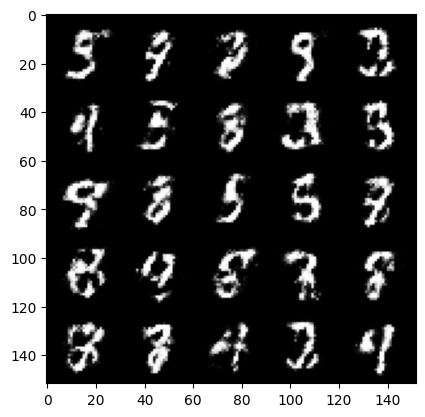

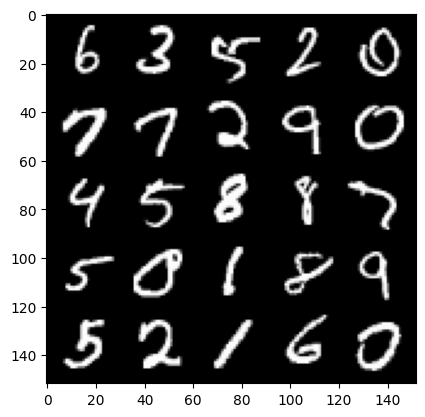

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 74, step 35000: Generator loss: 1.9085338224411017, discriminator loss: 0.3450625831663612


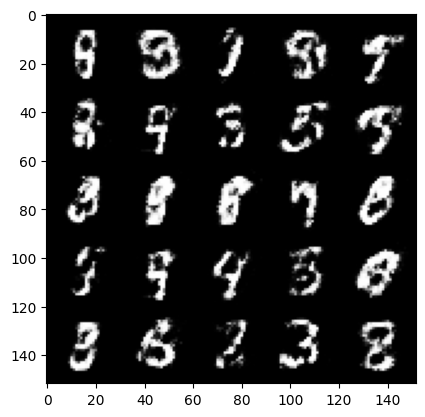

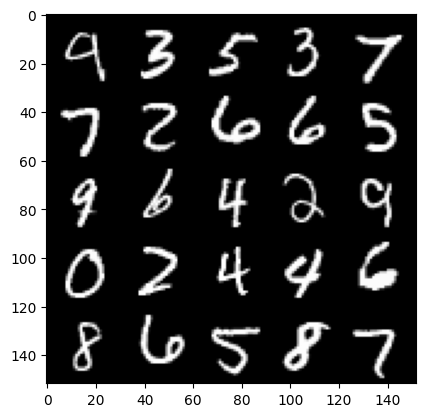

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 85, step 40000: Generator loss: 1.7624280091524154, discriminator loss: 0.3695742403060199


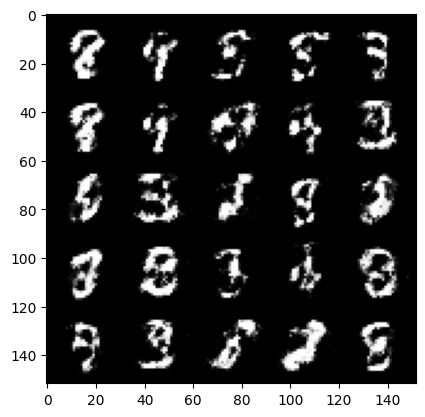

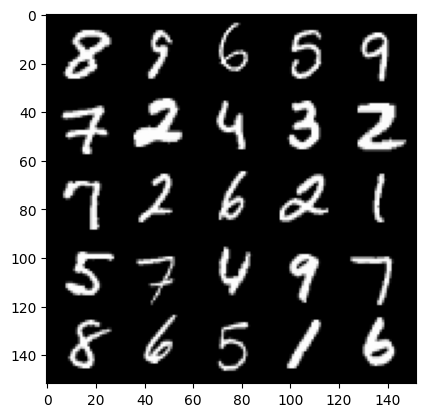

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 95, step 45000: Generator loss: 1.7131087253332127, discriminator loss: 0.38358948507905144


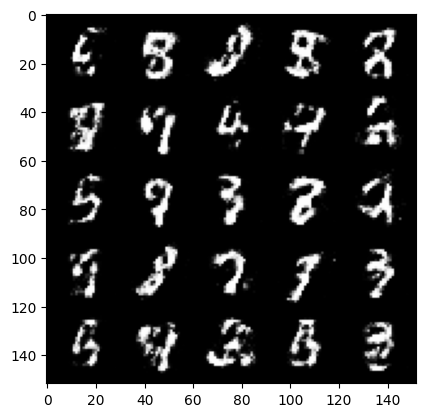

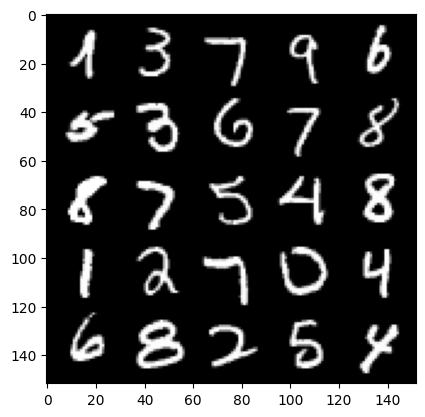

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

In [27]:
from tqdm.auto import tqdm
cur_step=0
mean_generator_loss=0
mean_discriminator_loss=0
test_generator=True
gen_loss=False
error=False
for epoch in range(100):
  for real,_ in tqdm(dataloader):
    cur_batch_size=len(real)
    real=real.view(cur_batch_size,-1).to(device)
    disc_opt.zero_grad()

    disc_loss=get_disc_loss(gen,disc,criterion,real,cur_batch_size,z_dim,device)
    disc_loss.backward(retain_graph=True)
    disc_opt.step()
    if test_generator is not None:
      old_generator_weights=gen.gen[0][0].weight.detach_().clone()

    gen_opt.zero_grad()
    gen_loss=get_gen_loss(gen,disc,criterion,real,cur_batch_size,z_dim,device)
    gen_loss.backward(retain_graph=True)
    gen_opt.step()
    mean_discriminator_loss+=disc_loss.item()/display_step
    mean_generator_loss+=gen_loss.item()/display_step
    if cur_step % display_step == 0 and cur_step > 0:
        print(f"Epoch {epoch}, step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
        fake_noise = get_noise(cur_batch_size, z_dim, device)
        fake = gen(fake_noise)
        show_tensor_images(fake)
        show_tensor_images(real)
        mean_generator_loss = 0
        mean_discriminator_loss = 0
    cur_step += 1